# Classification Metrics

Olatomiwa Bifarin. <br>
PhD Candidate Biochemistry and Molecular Biology <br>
@ The University of Georgia

_This is a draft copy, a work in progress_

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
#For Seaborn plots
#import seaborn as sns; sns.set(style='white')

# Disable warnings in Anaconda
import warnings
warnings.filterwarnings('ignore')

# More sharp and legible graphics
%config InlineBackend.figure_format = 'retina'

import time

# Set seaborn figure labels to 'talk', to be more visible. 
#sns.set_context('talk', font_scale=0.8)

## Notebook Outline
1. [Problem Definition](#1)
2. [Binary Classification](#2) <br>
    2a. [Metrics](#2a) <br>
    2b. [Implementation](#2b)
3. [References and Resources](#3) <br>

## 1. Problem Definition
<a id="1"></a>

Now, say, you have built a machine learning model; the question you ask is: _'how well does this thing works anyways?'_. To answer this question, we will need to define the performance metrics. As you might have imagined, the metrics will depend on the kind of machine learning problem in view. 

What you will use for an object detection problem in computer vision will be quite different from what you will get for, say, binary classification. In this notebook, we will look at performance metrics for a binary classification problem.

## 2. Binary Classification
<a id="2"></a>

In this binary classification problem, the goal is to classify breast cancer as either benign or metastatic based on the features extracted from the cell nuclei characteristics in the histological images. 

Data description link: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [2]:
# Lets import the  breast cancer wisconsin dataset[link]
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data["data"]
y = data["target"]
feature_names = data["feature_names"]

df = pd.DataFrame(data=X, columns=feature_names)
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension           ...             worst radius  \
0                 0.07871           ...                    25.38   
1                 0.05667           ...                    24.99   
2                 0.05999           ...                    23.57   
3                 0.09744           ...                    14.91   
4                 0.05883           ...                    22.54   

   worst texture  worst perimeter  worst area  worst smoothness  \
0          17.33           184.60      2019.0            0.1622   
1          23.41           158.80      1956.0            0.1238   
2          25.53           152.50      1709.0            0.1444   
3          26.50            98.87       567.7            0.2098   
4          16.67           152.20      1575.0            0.1374   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   worst fractal dimension  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 30 columns]

In [3]:
# The features
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [4]:
# The dimension of the feature table
X.shape

(569, 30)

In [5]:
# Dimension of the target table
y.shape

(569,)

In [6]:
print ("Number of benign cancer:",list(y).count(0))
print ("Number of malignant cancer:",list(y).count(1))

Number of benign cancer: 212
Number of malignant cancer: 357


In [7]:
from sklearn.model_selection import train_test_split
# split train test 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (455, 30)
Training Labels Shape: (455,)
Testing Features Shape: (114, 30)
Testing Labels Shape: (114,)


### 2a Metrics
<a id="2a"></a>

 ### <center> `Prediction Classes` <center/>
<img src='datasets/metrics/prediction_metric.png' width="600"/>
The four prediction classes from which the performance metrics will be derived. In the right figure, we have the confusion matrix, and they are largely self explanatory.


 ### <center> `Performance Metrics in Pictograms` <center/>
<img src='datasets/metrics/Sen_Spe.png' width="500"/>
    
- `Accuracy` is the percentage of correctly predicted samples
    
- `Precision` or the positive predictive value is the percentage of all positively predicted samples that are in fact positive. 

- `Sensitivity` or `recall` is the percentage of positive cases that was correctly classified as positive cases (In medicine, how many patients that have a specific disease will be detected with the model)

- `Specificity` is the percentage of negative cases that are correctly classified as negative cases. (In medicine, the percentage of healthy patient that are detected as healthy by the model. 

<img src='datasets/metrics/ROC.png' width="400"/>

- `ROC Curve`: ROC curves plot true positive rate (also called the recall/sensitivity) against the false positive rate at different classification decision thresholds. The area under the ROC curve (AUC) gives a measure of the discriminative power of a model between the positive and negative classes. As such an AUC of 1 is indicative of a perfect prediction while an AUC of 0.5 is indicative of a random classification. 0.5 AUC is shown in the dotted red line in the ROC curve. 


### <center> `Performance Metrics for Imbalanced Datasets` <center/>

$$\textbf{F1 score}= \dfrac{\textbf{Precision} \cdot \textbf{Recall}}{\textbf{Precision} + \textbf{Recall}}\times \textbf{2}$$

The F1 score is the harmonic mean of the precision and the recall. It is a measure of a test's accuracy, and potentially more informative than the _naive accuracy_ 

$$\textbf{MCC}= \dfrac{\textbf{TP} \times \textbf{TN} - \textbf{FP} \times \textbf{FN}}{\sqrt{(\textbf{TP} + \textbf{FP})(\textbf{TP} + \textbf{FN})(\textbf{TN} + \textbf{FP})(\textbf{TN} + \textbf{FN})}}$$

Matthews correlation coefficient (MCC) is essentially a measure of correlation between ground truth and predicted classes in a binary classification problem, as such output ranges from -1 to +1.

### 2b Code Implementation
<a id="2b"></a>

> Here, I import the linear SVM model from sklearn, this will be our model of choice

In [8]:
from sklearn import svm
linsvm = svm.SVC(kernel = 'linear', probability=True, random_state=42)

In [9]:
from sklearn.model_selection import cross_val_predict
# We will be predicting using the training dataset under 5-fold cross validated conditions.
y_pred_train = cross_val_predict(linsvm, X_train, y_train, cv=5)

**Confusion Matrix**

<img src='datasets/metrics/cm.png' width="250"/>

In [10]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_pred_train)

array([[155,  14],
       [  7, 279]])

<center> Confusion Matrix <center/>
    
|X|Benign| Malignant |
|---| --- | --- |
|Benign| 155| 14 |
|Malignant | 7| 279 |

In [11]:
y_train_perfect = y_train
confusion_matrix(y_train, y_train_perfect)

array([[169,   0],
       [  0, 286]])

<center> Confusion Matrix (Perfect) <center/>
    
|X| Benign| Malignant |
|---| --- | --- |
|Benign| 169| 0 |
|Malignant | 0| 286 |

**Accuracy**

<img src='datasets/metrics/accuracy.png' width="200"/>

In [36]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy: {0:.2%}".format(accuracy))

Accuracy: 95.38%


**Precision**

<img src='datasets/metrics/precision.png' width="150"/>

In [37]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_train, y_pred_train)
print("Precision: {0:.2%}".format(precision))

Precision: 95.22%


**Recall/Sensitivity**

<img src='datasets/metrics/recall.png' width="150"/>

In [38]:
recall = recall_score(y_train, y_pred_train)
print("Recall/Sensitivity: {0:.2%}".format(recall))

Recall/Sensitivity: 97.55%


**F1 Score**

$$\textbf{F1 score}= \dfrac{\textbf{Precision} \cdot \textbf{Recall}}{\textbf{Precision} + \textbf{Recall}}\times \textbf{2}$$

In [39]:
from sklearn.metrics import f1_score

f1 = f1_score(y_train, y_pred_train)
print("F1 Score: {0:.2%}".format(f1))

F1 Score: 96.37%


**Matthews Correlation Coefficient**

$$\textbf{MCC}= \dfrac{\textbf{TP} \times \textbf{TN} - \textbf{FP} \times \textbf{FN}}{\sqrt{(\textbf{TP} + \textbf{FP})(\textbf{TP} + \textbf{FN})(\textbf{TN} + \textbf{FP})(\textbf{TN} + \textbf{FN})}}$$

In [40]:
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_train, y_pred_train)
print("MCC: {0:+.2}".format(mcc))

MCC: +0.9


**Area Under the Curve: ROC Curve**

<img src='datasets/metrics/ROC.png' width="300"/>

In [23]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_train, y_pred_train)

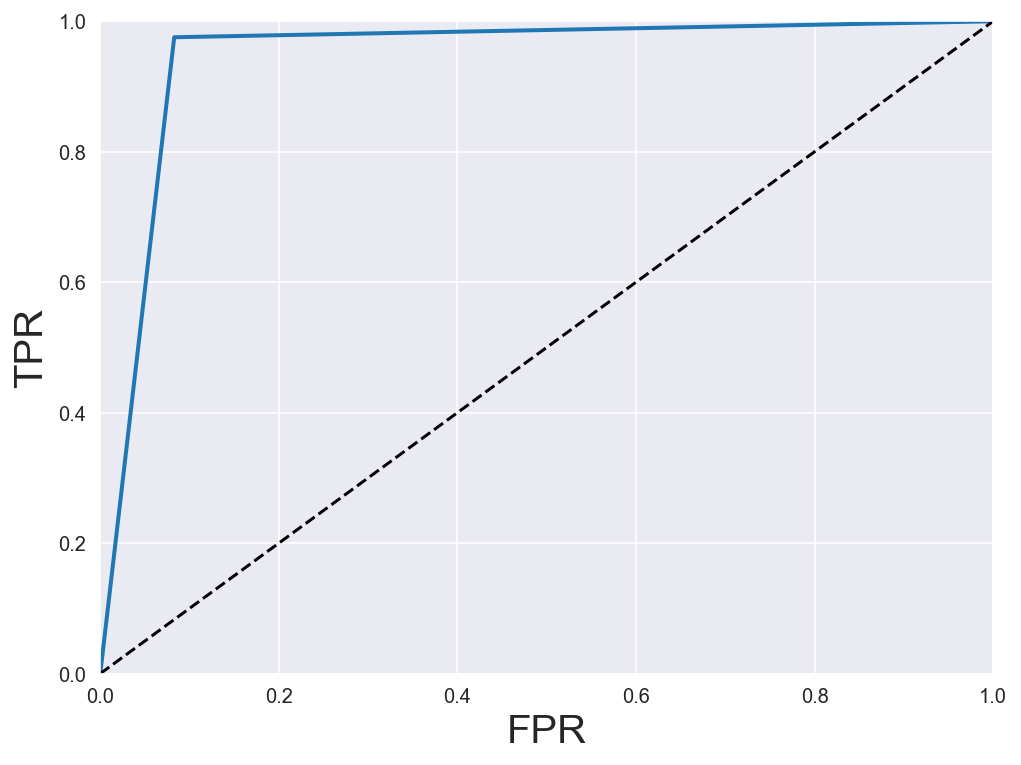

In [33]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('FPR', fontsize=20)
    plt.ylabel('TPR', fontsize=20)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [42]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, y_pred_train)
print("AUC: {0:.2}".format(auc))

AUC: 0.95


## 3. References and Resources
<a id="3"></a>
- __[Sklearn Classification metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)__

- Wikipedia entries for Precision, Recall, F1 score, Matthew Correlation Coefficient, and Sensitivity. 
